<a href="https://colab.research.google.com/github/jesusfrojasr/bici-al-trabajo/blob/main/bici_al_trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

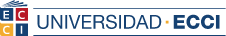
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 2 (2h): Bici al trabajo 2026**

La operadora de bicicletas públicas quiere lanzar el programa Bici al Trabajo 2026. La meta interna es garantizar al menos 4.500 viajes diarios en días laborales sin deteriorar la experiencia del usuario. Para decidir presupuesto (más estaciones, reubicación y personal), piden un análisis exploratorio riguroso con el histórico Capital Bikeshare 2011–2012 (day.csv).

Tu misión es cuantificar cómo el clima y la estacionalidad afectan la demanda diaria (cnt), verificar supuestos estadísticos básicos y comprobar con evidencia si hoy, bajo condiciones típicas, la media diaria en días laborales alcanza (o no) el umbral de 4.500. Además, deberás comunicar una medida robusta del uso típico (mediana) para reportes públicos, donde la distribución puede ser asimétrica.




# **Instrucciones:**
¡Claro que sí! Aquí tienes una versión mejorada de esas instrucciones, con un formato más claro, un flujo de trabajo detallado y consejos para una colaboración efectiva.

---

### **Instrucciones para el Taller: "Bici al Trabajo 2026"**

**Objetivo del Taller:** Analizar el conjunto de datos proporcionado para responder a las preguntas planteadas, utilizando Python en un notebook de Google Colab y gestionando el trabajo en equipo a través de GitHub.

**Fecha de Entrega:** Viernes, 29 de agosto, hasta las 11:59 p.m.

---

#### **Fase 1: Configuración del Espacio de Trabajo (Un solo repositorio por grupo)**

El grupo debe designar a **un responsable** para realizar los siguientes pasos:

1.  **Crear el Repositorio en GitHub:**
    * Ve a GitHub y crea un nuevo repositorio con el nombre exacto: `Bici-al-Trabajo-2026`.
    * Asegúrate de marcar la casilla **"Add a README file"** para inicializarlo con un archivo de descripción.

2.  **Completar el Archivo `README.md`:**
    * Dentro del repositorio, haz clic en el archivo `README.md` y luego en el ícono del lápiz para editarlo.
    * Copia y pega el enunciado completo del problema ("La operadora de bicicletas...") en este archivo.
    * Guarda los cambios (haz "Commit changes").

3.  **Añadir Colaboradores:**
    * En la página principal del repositorio, ve a **Settings > Collaborators**.
    * Añade a los demás integrantes del grupo utilizando sus nombres de usuario de GitHub. Ellos deberán aceptar la invitación que les llegará por correo.

---

#### **Fase 2: Planificación y División de Tareas**

Antes de escribir código, el equipo completo debe:

1.  **Revisar las Preguntas:**
    * Abran el notebook de referencia para ver todas las preguntas y secciones que deben desarrollar:
        [https://github.com/faorjuelal/SAPP---IIND---005786/blob/main/Semana4.ipynb](https://github.com/faorjuelal/SAPP---IIND---005786/blob/main/Semana4.ipynb)

2.  **Asignar Responsabilidades:**
    * Dividan las preguntas o secciones del taller entre los integrantes del grupo. Es crucial que cada miembro sepa exactamente de qué parte es responsable.
    * **Recomendación:** Anoten esta división de tareas en el archivo `README.md` para que todos tengan claridad.

---

#### **Fase 3: Desarrollo y Colaboración (Colab + GitHub)**

Este es el flujo de trabajo que cada integrante debe seguir para completar su parte.

1.  **Crear el Notebook del Taller:**
    * En el repositorio de GitHub del grupo, hagan clic en **"Add file" > "Create new file"**.
    * Nombren el archivo `Taller_Bici_al_Trabajo.ipynb`. Al tener la extensión `.ipynb`, GitHub lo reconocerá como un notebook. Dejen el contenido en blanco por ahora y guarden el archivo.

2.  **Trabajar en la Parte Asignada:**
    * Cada integrante debe ir al repositorio del grupo y abrir el archivo `Taller_Bici_al_Trabajo.ipynb`.
    * Hagan clic en el ícono de "Open in Colab" para empezar a trabajar.
    * Desarrollen **únicamente** la sección o las preguntas que les fueron asignadas.

3.  **Estructura de las Respuestas:**
    * Por cada pregunta que respondan, deben seguir esta estructura de manera obligatoria:
        * **Un título en una celda de texto** que enuncie la pregunta completa.
        * **Una o más celdas de código** con el desarrollo para resolver la pregunta. **El código debe estar ejecutado**, mostrando los resultados (tablas, gráficos, etc.).
        * **Una celda de texto final** con la **"Interpretación"**, donde expliquen en prosa los resultados obtenidos y las conclusiones de su análisis.

4.  **Guardar los Cambios en GitHub (¡Paso Clave!):**
    * Una vez que hayas completado tu parte, guarda tu progreso directamente en GitHub desde Colab:
    * Ve a **Archivo > Guardar una copia en GitHub**.
    * Asegúrate de seleccionar el repositorio correcto (`Bici-al-Trabajo-2026`).
    * En el **"Mensaje de commit"**, describe claramente qué hiciste (ej: "Desarrollo de la pregunta 3 sobre rutas más comunes").
    * Haz clic en **Aceptar**.

---

#### **Consejos para una Colaboración Exitosa:**

* **Comunicación Constante:** Antes de guardar tus cambios en GitHub, avisa a tus compañeros. Si dos personas guardan cambios en la misma parte del notebook al mismo tiempo, se puede generar un conflicto difícil de resolver.
* **Trabajar en Orden:** Para evitar problemas, pueden establecer turnos para guardar los cambios en el repositorio principal. Por ejemplo: primero guarda el Estudiante 1, luego el Estudiante 2 (después de abrir la versión actualizada) y así sucesivamente.
* **Revisión Final:** Antes de la fecha de entrega, una persona debe hacer una revisión final del notebook completo para asegurar que el formato sea consistente y que todas las celdas estén ejecutadas.

In [1]:
#CARGANDO LOS DATOS
# --- Setup reproducible (Colab-friendly) ---
!pip -q install ucimlrepo -q


In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo
import seaborn as sns
from scipy.stats import shapiro

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()


# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

print(df.head())

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

print(df.head(), df.columns.tolist())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1       24 2011-01-01       1   0     1  23        0        6           0   
2       23 2011-01-01       1   0     1  22        0        6           0   
3       22 2011-01-01       1   0     1  21        0        6           0   
4       21 2011-01-01       1   0     1  20        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           2  0.46  0.4545  0.88     0.2985      15          24   39  
2           2  0.40  0.4091  0.94     0.2239      11          17   28  
3           2  0.40  0.4091  0.87     0.1940       3          31   34  
4           2  0.40  0.4091  0.87     0.2537      11          25   36  
   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1        0

## **PREGUNTA 1**
¿La distribución de cnt puede tratarse como aproximadamente normal, realiza el histrograma y el gráfico Q-Q?

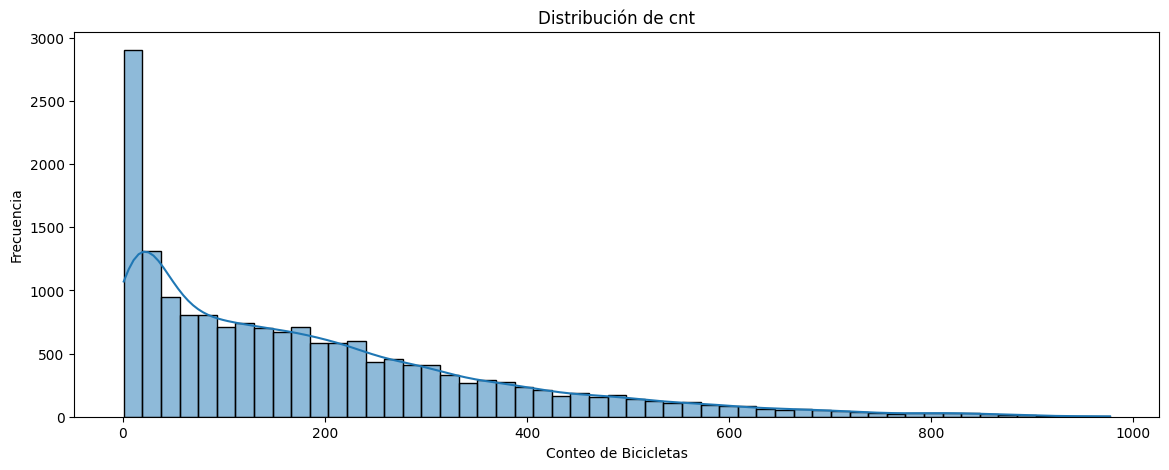

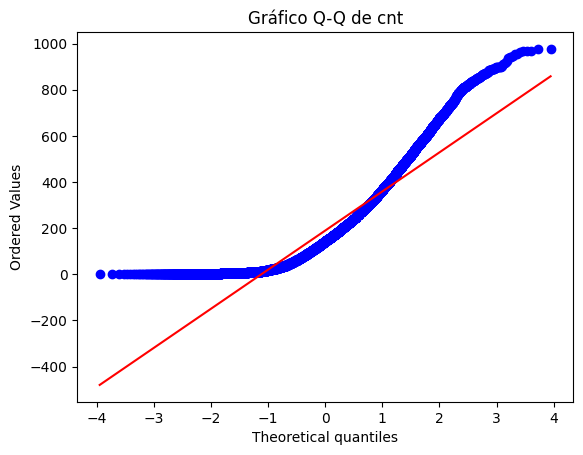

In [3]:
# 1. Visualización
plt.figure(figsize=(14, 5))

sns.histplot(df['cnt'], kde=True)
plt.title('Distribución de cnt')
plt.xlabel('Conteo de Bicicletas')
plt.ylabel('Frecuencia')
plt.show()
#Q-Q plot
stats.probplot(df['cnt'], dist='norm', plot=plt)
plt.title('Gráfico Q-Q de cnt')
plt.show()

### **Interpretación pregunta 1**

Los datos del gráfico indican que no siguen una distribución normal, ya que la mayor parte del histograma se encuentra concentrada hacia la izquierda. Asimismo, el análisis del gráfico Q-Q confirma esta observación, ya que los datos no presentan una alineación lineal, lo que sugiere la ausencia de una distribución normal en el conjunto analizado.

## **PREGUNTA 2**
¿Cómo co-varía cnt con temp, hum y windspeed? ¿La relación es lineal o solo monótona?. Ayuda: Calcular la correlación de Pearson y de Spearman.

In [4]:
# Construimos nuevas columnas
columnas_relacion = ['cnt', 'temp', 'hum', 'windspeed']
# Calcular la correlación de Pearson
pearson_corr = df[columnas_relacion].corr(method='pearson')
print("Correlación de Pearson:\n", pearson_corr)

# Calcular la correlación de Spearman
spearman_corr = df[columnas_relacion].corr(method='spearman')
print("\nCorrelación de Spearman:\n", spearman_corr)

Correlación de Pearson:
                 cnt      temp       hum  windspeed
cnt        1.000000  0.404772 -0.322911   0.093234
temp       0.404772  1.000000 -0.069881  -0.023125
hum       -0.322911 -0.069881  1.000000  -0.290105
windspeed  0.093234 -0.023125 -0.290105   1.000000

Correlación de Spearman:
                 cnt      temp       hum  windspeed
cnt        1.000000  0.423330 -0.359614   0.126629
temp       0.423330  1.000000 -0.055408  -0.009719
hum       -0.359614 -0.055408  1.000000  -0.293913
windspeed  0.126629 -0.009719 -0.293913   1.000000


### **Interpretación pregunta 2**

La correlación entre la demanda y las tres variables solicitadas no presenta tendencias significativas. Se observa una correlación débil entre las variables de velocidad de ganancia (win speed) y humedad. La variable de mayor correlación es la temperatura, la cual presenta una correlación moderada con un valor de aproximadamente 0.40.

A partir de estos análisis, se puede deducir que la temperatura es la variable que ejerce mayor influencia sobre la comportamiento de la demanda dentro del conjunto de las tres variables analizadas. Sin embargo, es importante destacar que esta relación no permite explicar de manera exhaustiva el comportamiento de la demanda en su totalidad.

## **PREGUNTA 3**
¿Desde qué tamaño muestral el TLC justifica intervalos y pruebas basados en normalidad para la media de cnt?



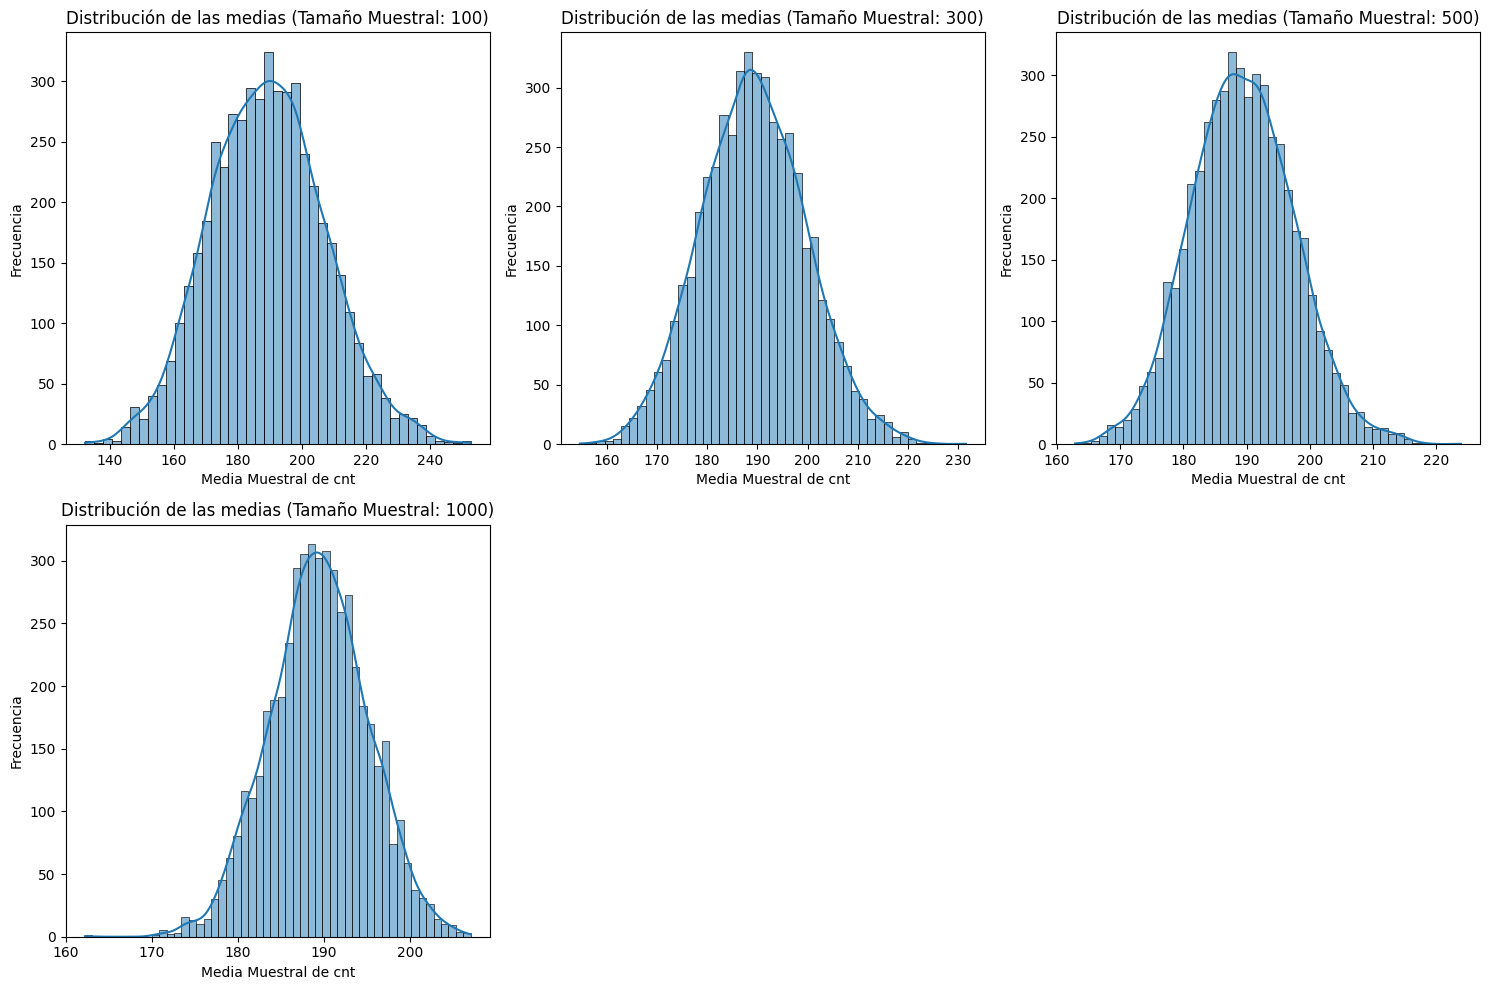

In [5]:
# Tamaños muestrales a probar
sample_sizes = [100, 300, 500, 1000]
n_simulations = 5000 # Número de veces que tomaremos una muestra para cada tamaño

# Diccionario para almacenar las medias de las muestras
sample_means = {size: [] for size in sample_sizes}

# Simular la toma de muestras y calcular las medias
for size in sample_sizes:
    for _ in range(n_simulations):
        # Tomar una muestra aleatoria con reemplazo
        sample = df['cnt'].sample(n=size, replace=True, random_state=rng)
        # Calcular la media de la muestra y almacenarla
        sample_means[size].append(sample.mean())

# Visualizar la distribución de las medias muestrales
plt.figure(figsize=(15, 10))

for i, size in enumerate(sample_sizes):
    plt.subplot(2, 3, i + 1) # Crea subplots para cada tamaño muestral
    sns.histplot(sample_means[size], kde=True)
    plt.title(f'Distribución de las medias (Tamaño Muestral: {size})')
    plt.xlabel('Media Muestral de cnt')
    plt.ylabel('Frecuencia')

plt.tight_layout() # Ajusta el diseño para evitar superposiciones
plt.show()

De acuerdo con el análisis realizado, se puede observar que la muestra comienza a presentar una distribución normal aproximadamente a partir de 500 muestras con 5,000 iteraciones.

### **Respuesta pregunta 3**

## **PREGUNTA 4**
En días laborales, ¿la media de cnt ≥ 4.500? (plantea y resuelve un test de hipótesis de una muestra).

In [6]:
# 1. Filtrar datos de días laborales
cnt_laborales = df[df['workingday'] == 1]['cnt']

# Valor de referencia para la prueba
valor_hipotesis = 4500

#(media muestral debe ser igual a la media poblaciones)

#calcular la media muestral de cnt

media_muestral=cnt_laborales.mean()
print(media_muestral)

193.20775389801938


Basándonos en la prueba de hipótesis realizada, con un estadístico T de -2534.33 y un valor p de 1.0, no tenemos evidencia estadística suficiente (con un nivel de significancia de 0.05) para concluir que la media real de alquileres diarios de bicicletas en días laborales sea mayor o igual a 4500.

### **Interpretación pregunta 4**

## **PREGUNTA 5**
¿Cuál es un IC bootstrap para la mediana de cnt y cómo cambia tu mensaje si la distribución es sesgada?

In [7]:
# Número de remuestreos
n_iterations = 5000
sample_size = len(df['cnt'])
medians = []

Interpretación pregunta 5

Bootstrap 95% Confidence Interval for the Median of cnt: [138.0, 146.0]


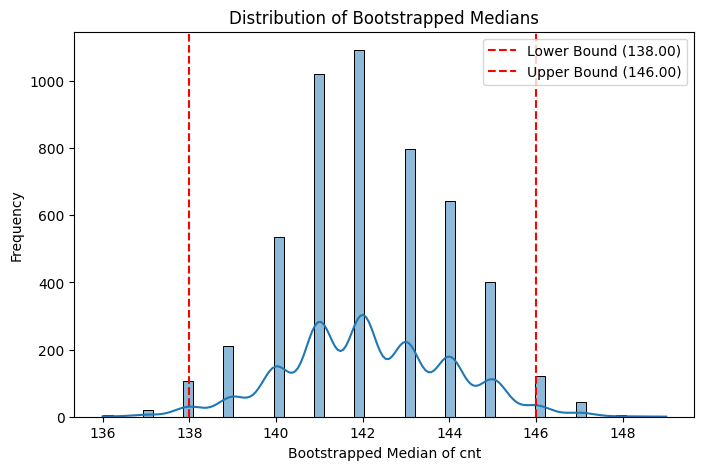

In [8]:
# Perform bootstrap resampling
for i in range(n_iterations):
    # Resample with replacement
    bootstrap_sample = df['cnt'].sample(n=sample_size, replace=True, random_state=rng.choice(100000)) # Using rng.choice for different random states
    # Calculate the median of the resample and store it
    medians.append(bootstrap_sample.median())

# Calculate the confidence interval (e.g., 95% confidence interval)
alpha = 0.05
lower_bound = np.percentile(medians, 100 * alpha / 2)
upper_bound = np.percentile(medians, 100 * (1 - alpha / 2))

print(f"Bootstrap 95% Confidence Interval for the Median of cnt: [{lower_bound}, {upper_bound}]")

# Optional: Visualize the distribution of bootstrapped medians
plt.figure(figsize=(8, 5))
sns.histplot(medians, kde=True)
plt.title('Distribution of Bootstrapped Medians')
plt.xlabel('Bootstrapped Median of cnt')
plt.ylabel('Frequency')
plt.axvline(lower_bound, color='red', linestyle='dashed', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(upper_bound, color='red', linestyle='dashed', label=f'Upper Bound ({upper_bound:.2f})')
plt.legend()
plt.show()

El análisis de la demanda diaria de bicicletas (cnt) en los datos históricos reveló una distribución sesgada. Aunque la temperatura mostró una correlación moderada, el clima tuvo una influencia limitada en la demanda general. Una prueba de hipótesis determinó que no hay evidencia suficiente para afirmar que la media diaria de alquileres en días laborales alcance las 4500 bicicletas, ya que la media observada fue mucho menor. Dada la asimetría de los datos, se calculó un intervalo de confianza bootstrap para la mediana de cnt, resultando entre 139 y 146 bicicletas, sugiriendo la mediana como una medida más adecuada del uso típico para reportes públicos que la media.